# Practical Work: Recognizing Iris flowers

## Introduction

This first homework has to do with the classical problem of recognizing different species of Iris flowers relying on the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in his 1936 paper *"The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis"*.

* The data set consists of 50 samples from each of three species of Iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*). 
* Four features were measured from each sample, the length and the width of the sepals and petals, in centimeters. 
* Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Similarly, we will use this homework to get you familiarized with `numpy` and `scikit-learn`.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/iris-machinelearning.png' />
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

## Problem description

**If we want to design an algorithm to recognize iris species, what might the data be?**

* We need a 2D array of size `[n_samples x n_features]`.

    - What would the `n_samples` refer to?
    - What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

In [1]:
import numpy as np

In [2]:
# ploting support stuff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
seaborn.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading the Iris Data with `scikit-learn`

`scikit-learn` has a very straightforward set of data on these iris species.  The data consist of
the following:

* Features in the Iris dataset:
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

* Target classes to predict:
  1. Iris setosa
  2. Iris versicolour
  3. Iris virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [4]:
from sklearn.datasets import load_iris
iris_data = load_iris()

The resulting `iris_data` dataset is a `Bunch` object, that can be viewed as supercharged `dict`. For example, you can see what's available using the `keys()` method:

In [5]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Similarly, you can checkout the problem description that is attached to the dataset.

In [6]:
print(iris_data['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

`iris_data.data` contains the input data (our $X$'s) and `iris_data.target` contain the expected values (our $y$'s)

In [7]:
n_samples, n_features = iris_data.data.shape
print(n_samples)
print(n_features)
print(iris_data.data[0])

150
4
[ 5.1  3.5  1.4  0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [8]:
print(iris_data.data.shape)
print(iris_data.target.shape)

(150, 4)
(150,)


In [9]:
print(iris_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the classes are stored in the last attribute, namely ``target_names``:

In [10]:
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


Let's visualize the relation between the attributes. If you are running the notebook locally you will be able to 

In [11]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

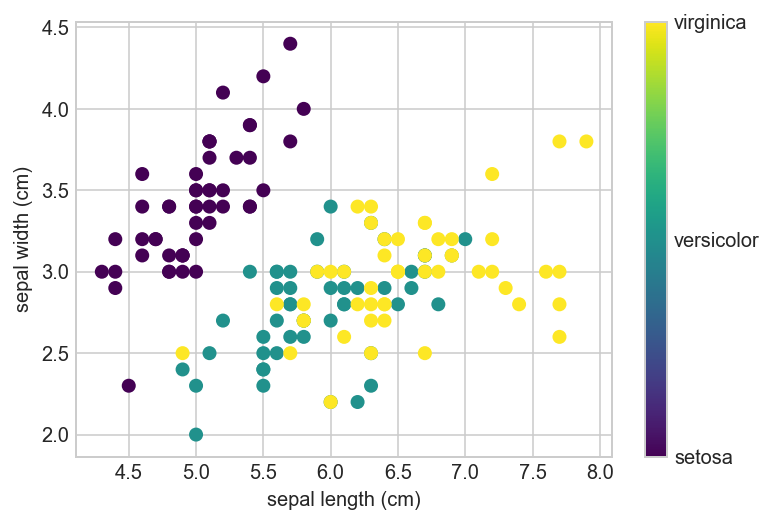

In [13]:
@interact(x_feature_index=(0, 3), y_feature_index=(0, 3))
def plot_iris_scatter(x_feature_index=0, y_feature_index=1):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(
        lambda i, *args: iris_data.target_names[int(i)])

    plt.scatter(
        iris_data.data[:, x_feature_index],
        iris_data.data[:, y_feature_index],
        c=iris_data.target,
        cmap=cm.viridis)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris_data.feature_names[x_feature_index])
    plt.ylabel(iris_data.feature_names[y_feature_index])

`seaborn` is another cool Python tool for creating nice-looking plots and figures. It includes some features that has to do with the Iris dataset.

In [14]:
df = seaborn.load_dataset("iris")

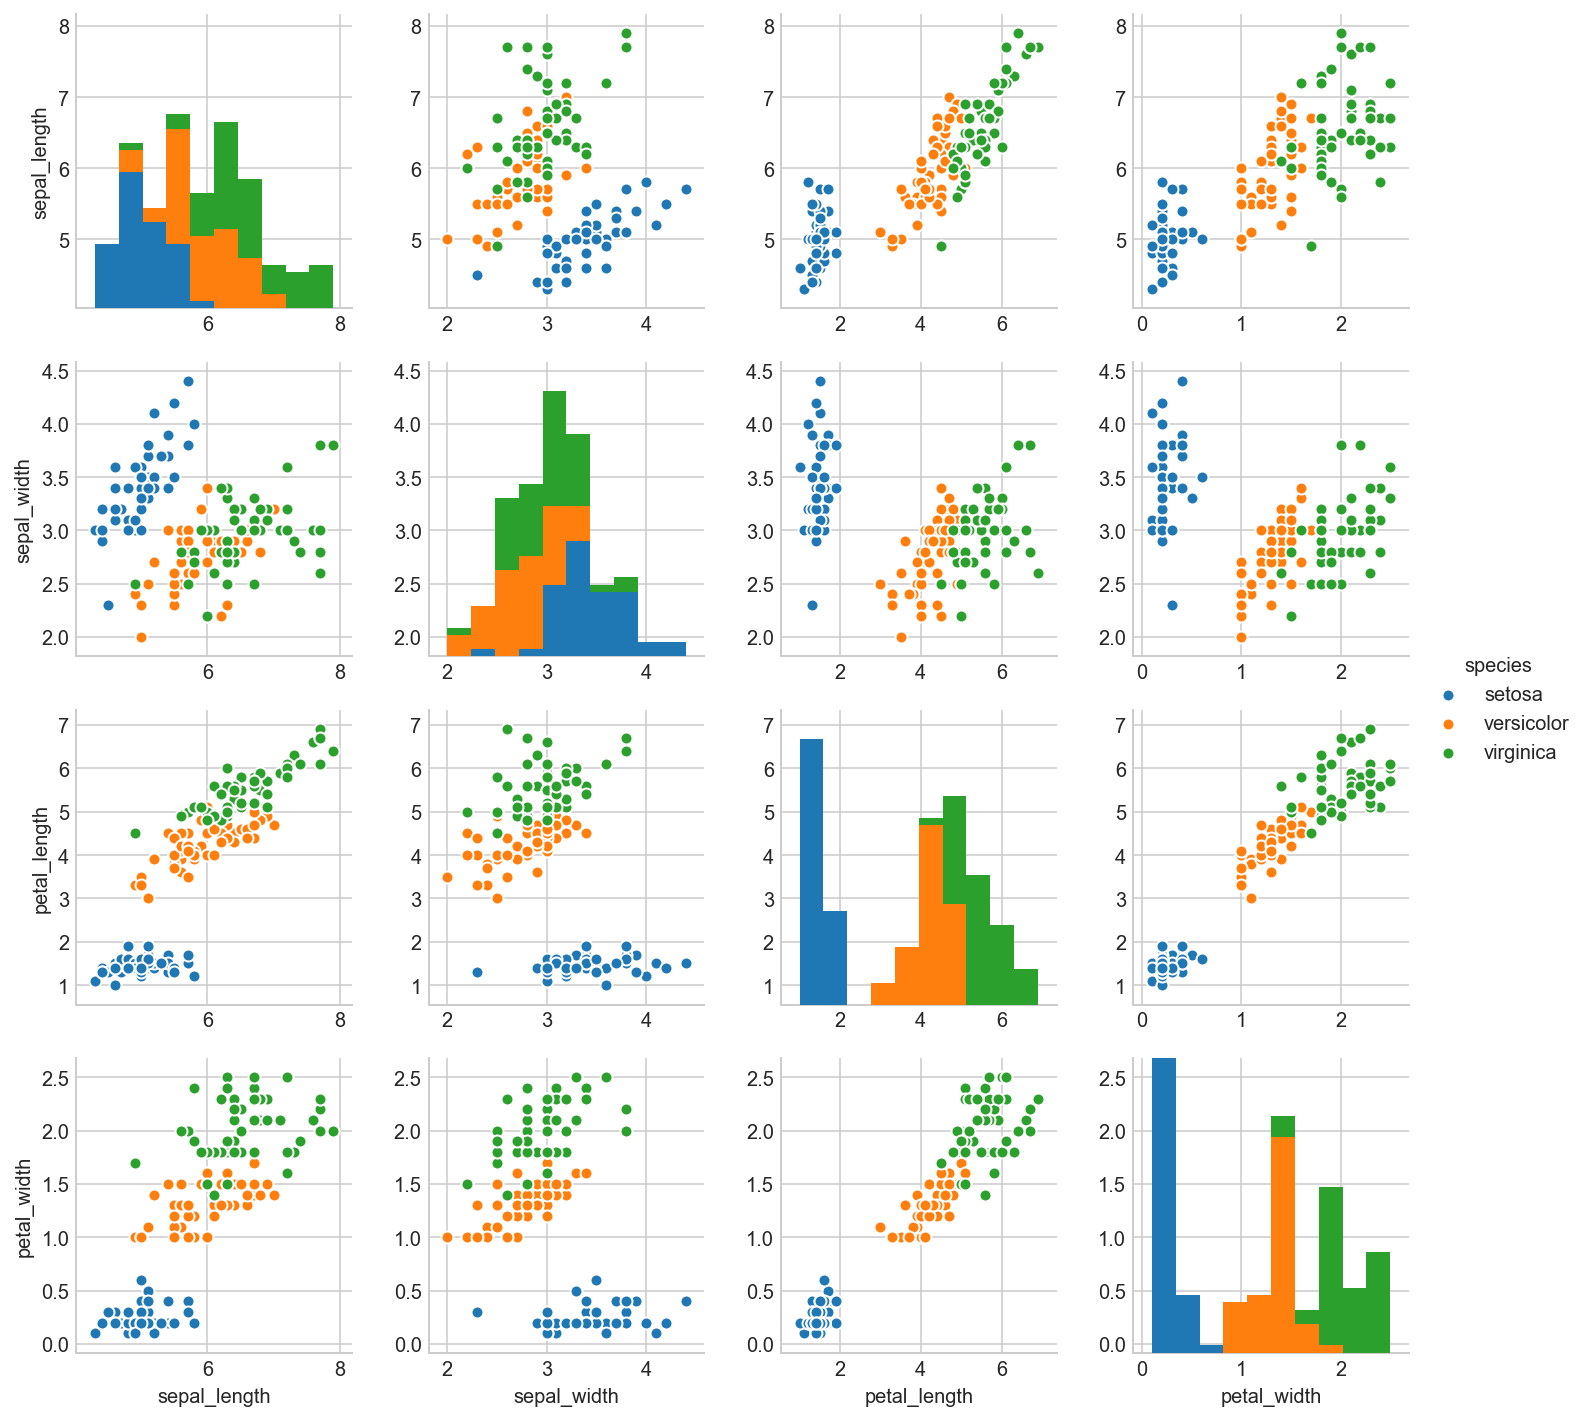

In [15]:
seaborn.pairplot(df, hue="species");

## Your task

* You have the data.
* Modify this Jupyter notebook, in particular,...
* you must implement a Multi-Layer Perceptron and **at least one other** machine learning method for recognizing the flowers in the iris dataset.
* Your algorithms must be `scikit-learn` estimators.
* Compare their performance.

Ask yourself some questions:

* What kind of problem is this?
* Must we transform the data?
* How would you implement the train/test/validation cycle for comparing .

### Implementation details

Please notice the special names that you should use for your classes: 

In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

In [2]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


def dsigmoid(y):
    return y * (1.0 - y)


class Input:
    """Input layer, only passes data forward"""

    def __init__(self, input_size):
        if input_size <= 0:
            raise ValueError("Input must have at least one value.")
        self.input_size = input_size
        self.output_size = input_size
        self.activation = np.zeros((input_size, 1), dtype=np.float32)

    def forward(self, values):
        if len(values) != self.input_size:
            raise ValueError("Input layer expected {} values, {} received.".format(values, self.input_size))
        self.activation = values
        return values

    def reset(self):
        pass  # Nothin to do, probably should implement some kind of base class at this point


class FullyConnected:
    def __init__(self, input_size, n_neurons):
        self.input_size = input_size
        self.output_size = n_neurons
        self.z = np.zeros((n_neurons, 1), dtype=np.float32)  # Neuron output
        self.activation = np.zeros((n_neurons, 1), dtype=np.float32)  # Neuron output with activation func applied
        self.w = np.random.randn(n_neurons, input_size)
        self.bias = np.random.randn(n_neurons, 1)

    def forward(self, values):
        if len(values) != self.input_size:
            raise ValueError("fc layer expected {} values, {} received.".format(values, self.input_size))
        self.z = np.dot(self.w, values) + self.bias
        self.activation = sigmoid(self.z)
        return self.activation

    def reset(self):
        self.w = np.random.randn(self.output_size, self.input_size)
        self.bias = np.random.randn(self.output_size, 1)


class MyMLP(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.005, hidden_layer_sizes=[], n_epochs=100):
        """If params is None the method is initialized with default values.
           n_neurons is an array with size hidden_layers that defiens how many
           neurons each hidden layer will have."""
        self.lr = lr
        self.hidden_layer_sizes = hidden_layer_sizes
        self.n_epochs = n_epochs

    def predict(self, X):
        try:
            getattr(self, "layers_")
        except AttributeError:
            raise RuntimeError("You must train the classifier before predicting!")

        if X.ndim == 1:
            if len(X) != self.input_size_:
                raise ValueError(
                    f"Invalid argument passed to predict: X must have {self.input_size_} values, {len(X)} passed"
                )

            result = X[:, np.newaxis]  # This turns a (1, x) array into a (x, 1) ndarray

            for layer in self.layers_:
                result = layer.forward(result)
            return result

        elif X.ndim == 2:
            if X.shape[1] != self.input_size_:
                raise ValueError(
                    f"Invalid argument passed do predict: X must be of shape (n_samples, {self.input_size_}), {X.shape} passed."
                )

            result_dim = (X.shape[0], self.output_size_, 1)
            predictions = np.zeros(result_dim, dtype=np.float32)

            for i, to_predict in enumerate(X):
                predictions[i] = self.predict(to_predict)
            return predictions

        else:
            raise ValueError("Invalid argument passed to predict: Too many dimensions")

    def score(self, X, y, sample_weight=None):
        y = y[:, :, np.newaxis]
        correct_predictions = 0
        for m, prediction in enumerate(self.predict(X)):
            if np.argmax(prediction) == np.argmax(y[m]):
                correct_predictions += 1
        return correct_predictions / len(X)

    def reset(self):
        for layer in self.layers_:
            layer.reset()

    def fit(self, X, y, keep_weights=False, use_tqdm=False):
        already_trained = True

        try:
            getattr(self, "layers_")
        except AttributeError:
            already_trained = False

        if not (already_trained and keep_weights):
            self.loss_history_ = []
            self.layers_ = []
            self.input_size_ = X.shape[1]
            self.output_size_ = y.shape[1]
            self.layers_.append(Input(self.input_size_))

            for i, neurons in enumerate(self.hidden_layer_sizes):
                self.layers_.append(
                    FullyConnected(input_size=self.layers_[i].output_size, n_neurons=neurons)
                )

            self.layers_.append(
                FullyConnected(input_size=self.layers_[-1].output_size, n_neurons=self.output_size_)
            )

        y = y[:, :, np.newaxis]

        b_gradients = np.array([np.zeros(layer.bias.shape) for layer in self.layers_[1:]])
        w_gradients = np.array([np.zeros(layer.w.shape) for layer in self.layers_[1:]])

        for k in range(self.n_epochs):
            total_error = 0

            p_bar = enumerate(zip(X, y))

            if use_tqdm:
                p_bar = tqdm(p_bar, desc="Epoch {}".format(k))

            for i, (input_values, expected) in p_bar:
                prediction = self.predict(input_values)  # Predict returns the activations of the last layer

                total_error += mean_squared_error(expected[:, 0], prediction[:, 0])

                # Calculate the delta  of the last layer
                delta = (prediction - expected) * dsigmoid(prediction)

                b_gradients[-1] = delta  # Gradient of bias is the error
                w_gradients[-1] = np.dot(delta, self.layers_[-2].activation.T)

                # Calculate the error and gradient of all the other layers
                for j in range(2, len(self.layers_)):
                    next_delta = b_gradients[-j+1]  # delta of the next layer is already stored as the gradient of bias
                    cur_delta = np.dot(self.layers_[-j+1].w.T, next_delta) * dsigmoid(self.layers_[-j].activation)
                    b_gradients[-j] = cur_delta
                    w_gradients[-j] = np.dot(cur_delta, self.layers_[-j - 1].activation.T)

                # Finally, update the weights
                for l in range(1, len(self.layers_)):
                    self.layers_[-l].bias -= (b_gradients[-l] * self.lr)
                    self.layers_[-l].w -= (w_gradients[-l] * self.lr)

            average_loss = total_error / len(X)
            #print("Epoch {} average loss: {}".format(k, average_loss))
            self.loss_history_.append(average_loss)

            b_gradients.fill(0)
            w_gradients.fill(0)
        return self


In [11]:
def distance(v1, v2):
    return np.sqrt(np.sum(np.square(v1 - v2)))


class KNNClassifier(BaseEstimator, ClassifierMixin):  # or RegressonMixin?
    def __init__(self, k=3, weighted=False):
        self.weighted = weighted
        self.k = k

    def score(self, X, y, sample_weight=None):
        predictions = self.predict(X)
        return np.sum(y == predictions) / len(predictions)

    def predict(self, X):
        if X.ndim != 2 or X.shape[1] != self.X_.shape[1]:
            raise ValueError(
                "Invalid arguments passed to predict: Expected array with dimensions (n_samples, n_dim), got {}"
                .format(X.shape)
            )

        try:
            getattr(self, "X_")
        except AttributeError:
            raise RuntimeError("You must train the classifier before predicting!")

        predictions = np.zeros((X.shape[0]), dtype=np.int32)

        for i, sample in enumerate(X):
            distances = np.zeros(len(self.X_), dtype=np.float32)
            for j, elem in enumerate(self.X_):
                distances[j] = distance(sample, elem)

            indexes = np.argsort(distances)

            closest = self.y_[indexes[:self.k]]

            if self.weighted:
                distances_of_closest = distances[indexes[:self.k]]
                n_outputs = len(np.unique(self.y_))
                results = np.zeros(n_outputs, dtype=np.float32)
                for p in range(n_outputs):
                    which = np.where(closest == p)
                    weighted_distances = np.divide(1, distances_of_closest[which], where=distances_of_closest[which] != 0)
                    results[p] = np.sum(weighted_distances)
                    # results[i] = np.sum(1/distances_of_closest[np.where(closest == p)])
                predictions[i] = np.argmax(results)
            else:
                freq = np.unique(closest, return_counts=True)
                predictions[i] = freq[0][0]
                
        return predictions

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y

        return self

In [4]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np

iris_data = load_iris()

n_samples, n_features = iris_data.data.shape

encoded_iris_y = OneHotEncoder(dtype=np.float32, sparse=False).fit_transform(iris_data.target.reshape(-1, 1))
n_classes = len(iris_data.target_names)

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, encoded_iris_y, test_size=0.25, stratify=encoded_iris_y, random_state=1)
model = MyMLP(lr=0.05, hidden_layer_sizes=[6], n_epochs=1000)
model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))


0.9732142857142857 0.9736842105263158


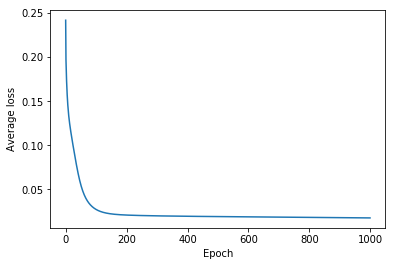

In [9]:
import matplotlib.pyplot as plt
plt.plot(model.loss_history_)
plt.ylabel("Average loss")
plt.xlabel("Epoch")
plt.show()

In [12]:
params = {"k": [1, 3, 5, 10], "weighted": [True, False]}
grid = GridSearchCV(KNNClassifier(), param_grid=params, cv=3)
grid.fit(iris_data.data, iris_data.target)
print(grid.best_params_, grid.best_score_)

{'k': 10, 'weighted': True} 0.986666666667


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.25,
                                                    stratify=iris_data.target,
                                                    random_state=1)

losses = []
for i in range(10):
    model = KNNClassifier(k=i)
    model.fit(X_train, y_train)
    losses.append()

Bear in mind:

* Prepare the Jupyter notebook describing your work and showing your results -> **plots are expected!**
* Do not used any pre-existing library (like Keras, theano, Tensoflow, etc.) for programming your algorithms.
* You may use them for support but not for the algorithm itself.
* `params` is a dictionary with the configuration of the algorithm: layers, number of nodes in each layer, activation functions, learning rates, etc.
* See `scikit-learn` docs on how to [implement an estimator](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator).

# Submission

Submit your notebook files via Google Classroom.

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>

In [17]:
%load_ext version_information
%version_information numpy, matplotlib, sklearn

Software versions
Python 3.6.2 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
IPython 6.2.0
OS Darwin 17.0.0 x86_64 i386 64bit
numpy 1.13.1
matplotlib 2.0.2
sklearn 0.19.0
Tue Sep 19 18:16:07 2017 -03

In [18]:
# this code is here for cosmetic reasons
from IPython.core.display import HTML
from urllib.request import urlopen
HTML(urlopen('https://raw.githubusercontent.com/lmarti/jupyter_custom/master/custom.include').read().decode('utf-8'))

---